# Identifying iris species from sepal and petal dimensions

The `sklearn` module of python comes with a few data sets and one of them is iris data set. We will use this data set to build model that identifies the species of the iris plants using the lengths and widths of the sepals and petals.

## Load the required modules
We will use the following python modules for this study.

1. `sklearn`
1. `numpy`
1. `pandas`
1. `matplotlib`
1. `seaborn`

In [45]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load the iris data set
Let's load the iris data set from the `sklearn` module and store it as a `pandas` dataframe.

In [18]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
target_dictionary = dict(zip([0, 1, 2], iris['target_names']))
iris_data.rename(columns={'sepal length (cm)': 'sepal_length'
                          , 'sepal width (cm)' : 'sepal_width'
                          , 'petal length (cm)' : 'petal_length'
                          , 'petal width (cm)': 'petal_width'}, inplace=True)
iris_data['target'] = iris_data['target'].map(target_dictionary)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory data analysis

Let's explore how different variables are distributed and how are they related to the `target` variable and with each other.

### The target variable
The first variable we should have a look at is the $target$ and has three possible values; **setosa**, **versicolor**, and **virginica**. The distribution of the variable is as shown below

In [19]:
iris_data.target.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

This shows that the classification problem we are to model is of balance class; and we are good to use `accuracy` as the performance metric. The accuracy is defined as;
$$\hbox{accuracy} = \frac{\hbox{number of correct predictions}}{\hbox{total observations}}$$

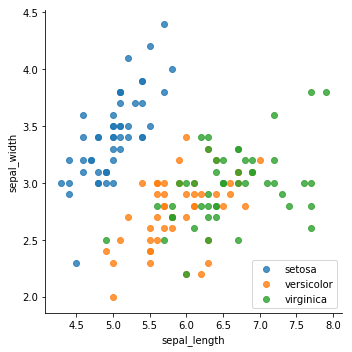

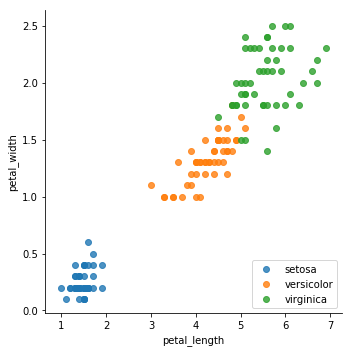

In [20]:
sns.lmplot(x="sepal_length", y="sepal_width", data=iris_data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')
plt.show()

sns.lmplot(x="petal_length", y="petal_width", data=iris_data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')
plt.show()

It seems like the variables $sepal\_length$ and $sepal\_width$ do have some _say_ in determining the species of the iris plants. 

The species patterns in the case of $petal\_width$ and $petal\_length$ is much stronger and the linear pattern also suggests that the two variables $petal\_width$ and $petal\_length$ are strongly correlated. We may want to test if the two variables are redundent and one just one of these is enough to determine the species.

In [21]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


As expected $petal\_length$ and $petal\_width$ are strogly correlated. It may be better to use only one of these variables to fit the model. We will test that further later on. Also note that the $sepal\_width$ and $petal\_length$ have a weak and negative relationship between each other. That is an interesting observation; the longer the petals of an iris plant the shorter span sepals will have.

### Sepal Length
Let's explore how the $sepal\_length$ variable is distributed.

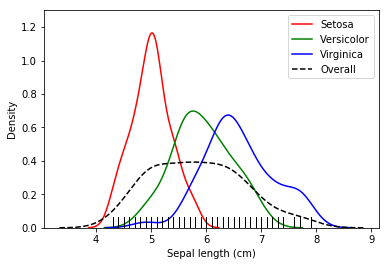

In [22]:
target_setosa = iris_data.loc[iris_data['target'] == 'setosa']
target_versicolor = iris_data.loc[iris_data['target'] == 'versicolor']
target_virginica = iris_data.loc[iris_data['target'] == 'virginica']

sns.distplot(target_setosa[['sepal_length']], hist=False, rug=True, color='r', label='Setosa')
sns.distplot(target_versicolor[['sepal_length']], hist=False, rug=True, color='g', label = 'Versicolor')
sns.distplot(target_virginica[['sepal_length']], hist=False, rug=True, color='b', label = 'Virginica')
sns.distplot(iris_data[['sepal_length']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}, label = 'Overall')
plt.ylim(0, 1.3)
plt.legend()
plt.xlabel("Sepal length (cm)")
plt.ylabel("Density")
plt.show()

The $sepal\_length$ is distributed 'approximately normally' (slightly skewed to the right) within each group and overall as well (as shown by the _dashed_ black curve). It is evident from the the distribution curves that $sepal\_length$ does indeed play a role in determining the specie of the iris plant. Setosa specie has the shortest sepals while Virginica specie has the longest ones. The specie Versicolor has sepals lengths somewhat in the middle on average.
### Sepal Width
Now let's explore $sepal\_width$ and see how is this distributed and does this play some part in determining the specie of the plant.

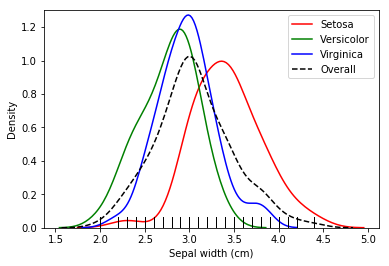

In [23]:
sns.distplot(target_setosa[['sepal_width']], hist=False, rug=True, color='r', label='Setosa')
sns.distplot(target_versicolor[['sepal_width']], hist=False, rug=True, color='g', label = 'Versicolor')
sns.distplot(target_virginica[['sepal_width']], hist=False, rug=True, color='b', label = 'Virginica')
sns.distplot(iris_data[['sepal_width']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}, label = 'Overall')
plt.ylim(0, 1.3)
plt.legend()
plt.xlabel("Sepal width (cm)")
plt.ylabel("Density")
plt.show()

Again, the variable $sepal\_width$ seems to have some impact on determining the specie of the iris plants. Also, the $sepal\_width$ is nomally distributed overall and is approximately normal within each group of plants.
## Petal Length
The distribution of the variable $petal\_width$ is shown here

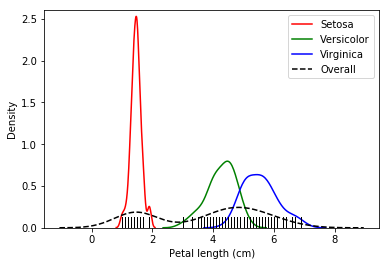

In [24]:
sns.distplot(target_setosa[['petal_length']], hist=False, rug=True, color='r', label='Setosa')
sns.distplot(target_versicolor[['petal_length']], hist=False, rug=True, color='g', label = 'Versicolor')
sns.distplot(target_virginica[['petal_length']], hist=False, rug=True, color='b', label = 'Virginica')
sns.distplot(iris_data[['petal_length']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}, label = 'Overall')
plt.ylim(0, 2.6)
plt.legend()
plt.xlabel("Petal length (cm)")
plt.ylabel("Density")
plt.show()

The variable $petal\_length$ seems to be very strong indicator of differentiating the Setosa specie from the other two which seems to have the shortest petals. The petals of Virginica specie are the longest but there is still some overlap of their lengths with the lengths of the petals of Versicolor plants. The overall distribution is nearly binomial whihle the distribution of each categories is close to normal(slightly left skewed for Versicolor specie).

### Petal Width
Lets look at the distribution of the $petal\_width$

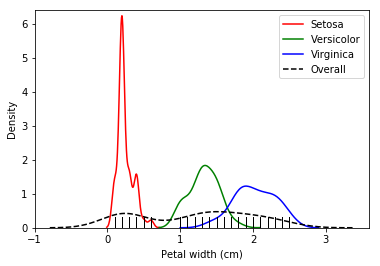

In [25]:
sns.distplot(target_setosa[['petal_width']], hist=False, rug=True, color='r', label='Setosa')
sns.distplot(target_versicolor[['petal_width']], hist=False, rug=True, color='g', label = 'Versicolor')
sns.distplot(target_virginica[['petal_width']], hist=False, rug=True, color='b', label = 'Virginica')
sns.distplot(iris_data[['petal_width']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}, label = 'Overall')
plt.ylim(0, 6.4)
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Density")
plt.show()

The distribution of this variable is very similar to $petal\_length$ as expected from the correlation value of 0.96 suggests.

## Feature Engineering
I would like to think that the area os sepals and petals should play some role in determining the iris specie. It is not easy to compute true areas of the petals and sepals with the lengths and widths purely because those are not perfect geometric shapes. Perhaps $petal\_width \times petal\_length$ is a good proxy of the area of the petals (times a constant) and $sepal\_width \times sepal\_length$ is that of sepals. Let's add those two variables in the given data set with the hope that those will play a role in determining the specie of the iris plants.

In [26]:
iris_data['sepal_area'] = iris_data['sepal_width'] * iris_data['sepal_length']
iris_data['petal_area'] = iris_data['petal_width'] * iris_data['petal_length']

target_setosa = iris_data.loc[iris_data['target'] == 'setosa']
target_versicolor = iris_data.loc[iris_data['target'] == 'versicolor']
target_virginica = iris_data.loc[iris_data['target'] == 'virginica']

## Explore newly created variables
The distribution of the variable $sepal\_area$ and that of $petal\_area$ is as shown below

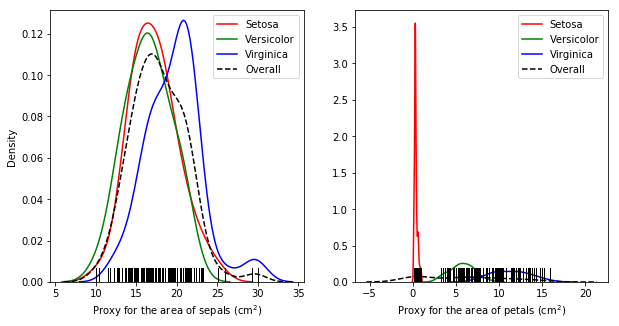

In [27]:
f, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
sns.distplot(target_setosa[['sepal_area']], hist=False, rug=True, color='r', label='Setosa', ax = axes[0])
sns.distplot(target_versicolor[['sepal_area']], hist=False, rug=True, color='g', label = 'Versicolor', ax = axes[0])
sns.distplot(target_virginica[['sepal_area']], hist=False, rug=True, color='b', label = 'Virginica', ax = axes[0])
sns.distplot(iris_data[['sepal_area']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}
             , label = 'Overall', ax = axes[0])
axes[0].legend()
axes[0].set_ylabel("Density")
axes[0].set_xlabel("Proxy for the area of sepals (cm$^2$)")
sns.distplot(target_setosa[['petal_area']], hist=False, rug=True, color='r', label='Setosa', ax = axes[1])
sns.distplot(target_versicolor[['petal_area']], hist=False, rug=True, color='g', label = 'Versicolor', ax = axes[1])
sns.distplot(target_virginica[['petal_area']], hist=False, rug=True, color='b', label = 'Virginica', ax = axes[1])
sns.distplot(iris_data[['petal_area']], hist=False, rug=True, color='black', kde_kws={'linestyle':'--'}
             , label = 'Overall', ax = axes[1])
axes[1].legend()
axes[1].set_xlabel("Proxy for the area of petals (cm$^2$)")
plt.show()

## Model

Let's fit a Logist Regression model on the full data set with the six independent variables or _features_ and $target$ as the dependent variable or the _outcome_.

In [28]:
mod_log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
mod_log.fit(iris_data.drop(labels=['target'], axis = 1), iris_data['target'])
accuracy = accuracy_score(iris_data['target'], mod_log.predict(iris_data.drop(labels=['target'], axis = 1)))
accuracy

0.97999999999999998

## Feature Selection
### The most important variables
We can fit the model on the selection of variables recursively and find the importance of variables in maximizing the accuracy score.

In [29]:
features_space = list(iris_data.drop(labels=['target'], axis = 1).columns.values)
for col in features_space:
    mod_test_log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
    mod_test_log.fit(iris_data[[col]], iris_data['target'])
    accuracy_test = accuracy_score(iris_data['target'], mod_test_log.predict(iris_data[[col]]))
    print(col, ':  ', "{0:.2f}".format(accuracy_test))

sepal_length :   0.75
sepal_width :   0.55
petal_length :   0.95
petal_width :   0.96
sepal_area :   0.47
petal_area :   0.95


The most important variable seems to be the $petal\_width$, then $petal\_area$ and $petal\_width$. Let's find out which one of the two variables increases the accuracy better than the other

In [30]:
features_space.remove('petal_width')
for col in features_space:
    mod_test_log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
    mod_test_log.fit(iris_data[['petal_width', col]], iris_data['target'])
    accuracy_test = accuracy_score(iris_data['target'], mod_test_log.predict(iris_data[['petal_width', col]]))
    print('petal_width, ', col, ':  ', "{0:.2f}".format(accuracy_test))

petal_width,  sepal_length :   0.96
petal_width,  sepal_width :   0.96
petal_width,  petal_length :   0.97
petal_width,  sepal_area :   0.95
petal_width,  petal_area :   0.95


This suggests that $petal\_length$ is the next important variable to improve the _accuracy_. Note that the improvement is only marginal and with a different size of sample data we may find slightly different results. Let's find out the next important variable

In [31]:
features_space.remove('petal_length')
for col in features_space:
    mod_test_log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
    mod_test_log.fit(iris_data[['petal_width', 'petal_length', col]], iris_data['target'])
    accuracy_test = accuracy_score(iris_data['target'], mod_test_log.predict(iris_data[['petal_width', 'petal_length', col]]))
    print('petal_width, petal_length, ', col, ':  ', "{0:.2f}".format(accuracy_test))

petal_width, petal_length,  sepal_length :   0.97
petal_width, petal_length,  sepal_width :   0.98
petal_width, petal_length,  sepal_area :   0.99
petal_width, petal_length,  petal_area :   0.96


Yes - the next variable that helps improving the accuracy is $sepal\_area$. And

In [32]:
features_space.remove('sepal_area')
for col in features_space:
    mod_test_log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
    mod_test_log.fit(iris_data[['petal_width', 'petal_length', 'sepal_area', col]], iris_data['target'])
    accuracy_test = accuracy_score(iris_data['target']
                                   , mod_test_log.predict(iris_data[['petal_width', 'petal_length', 'sepal_area', col]]))
    print('petal_width, petal_length, sepal_area, ', col, ':  ', "{0:.2f}".format(accuracy_test))

petal_width, petal_length, sepal_area,  sepal_length :   0.99
petal_width, petal_length, sepal_area,  sepal_width :   0.98
petal_width, petal_length, sepal_area,  petal_area :   0.98


We may not want to include $sepal\_width$ and $petal\_area$, whereas $sepal\_length$ may be useful to include so that another dimension of sepals is part of the model features at least. Although $sepal\_length$ does not improve the _accuracy_. Thus the final set of model feature we are going to use are $petal\_width$, $petal\_length$, $sepal\_area$, and $sepal\_length$ to explain the variations in thre response variable $target$.
## Tuning the model to generalize
### Holdout validation
Although the model has a very high accuracy score on the _seen_ data, we are not sure how will this perform on new observations. One test that we can perform is to train the model on a subset of all of the 150 observations and then test how it performs on the remaining observations. Let's take 80% of the observations randomly to train the model and then make predictions from the remaining observations and observer how this model performs on those observations.

In [44]:
model_features = ['petal_width', 'petal_length', 'sepal_area', 'sepal_length']
X_train, X_test, y_train, y_test = train_test_split(iris_data[model_features]
                                                    , iris_data['target']
                                                    , test_size = 0.20, random_state = 111)
mod_holdout = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
mod_holdout.fit(X_train, y_train)
holdout_accuracy = accuracy_score(y_test, mod_holdout.predict(X_test))
holdout_accuracy

0.90000000000000002

This suggests that the model does not generalize as good on the _unseen_ data as it was performing on the data it _had seen_. And its accuracy on the _unseen_ data is 90%. This method of validation is called _holdout validation_ which gives us an understanding of how well a model will perform on the _unseen data_. There is a draw back of this method though; we do not harvest full advantage of all the data which is not great.
### K-Fold cross validation
An extension of the _holdout validation_ is _cross validation_ in which overall data is split in $k$ random partitions and the model is trained $k$ times on the data; each time _trained_ on a union of different $k-1$ partitions and _tested_ on the only ramining partition. The average score of the $k$ models gives a better understanding of how the model will generalize on the _unseen data_.

In [55]:
mod_crossval = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
scores = cross_val_score(mod_crossval, iris_data[model_features], iris_data['target'], cv=5, scoring = 'accuracy')
list(scores)

[0.96666666666666667, 1.0, 0.93333333333333335, 0.96666666666666667, 1.0]

The mean score and the 95% confidence interval of the score estimate are hence given by:

In [56]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.05)


#### The optimum $k$
There is no fixed rule for finding the optimum value of $k$ for a model. The depends on the data itself. I sometimes find it useful to recursively choose different values of $k$ and plot the metrics of all the models against the values of $k$ to understand the underlying dispersivity in the makup of data.

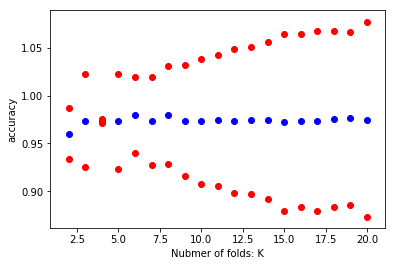

In [67]:
k_vals = []
accuracy_u = []
accuracy_l = []
accuracy_m = []
for k in range(2, 21):
    mod_crossval = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', random_state = 0)
    scores = cross_val_score(mod_crossval, iris_data[model_features], iris_data['target'], cv=k, scoring = 'accuracy')
    k_vals.append(k)
    accuracy_u.append(scores.mean() + scores.std() * 2)
    accuracy_l.append(scores.mean() - scores.std() * 2)
    accuracy_m.append(scores.mean())
    
plt.scatter(k_vals, accuracy_m, c = 'b')
plt.scatter(k_vals, accuracy_l, c = 'r')
plt.scatter(k_vals, accuracy_u, c = 'r')
plt.xlabel('Nubmer of folds: K')
plt.ylabel('accuracy')
plt.show()

It appears that with the small number of folds, the 95% confidence interval is also small. This makes sense because we donot have large number of sample space and each test smaple is big enough to give us a more stable _accuracy_. We ideally would like to have large $k$ to have more smaples to choose the average _accuracy_ from. But in doing so, each test sample reduces in size and the _accuracy_ score from the test samples becomes vulnerable to extreme changes. In this example, $k=6$ seems to be the best option which makes the training tests large enough to yield relativey stable models whoe performance on the test sets does not deviate much from the mean.